<a href="https://colab.research.google.com/github/mohameddhamed/data-science-intro/blob/main/Task4_5_Models_MCCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
PROJECT_FOLDER = '/content/drive/MyDrive/ML_Attack_Classifier'

Mounted at /content/drive


In [3]:
import pandas as pd

# Load SFS feature set and labels from Task 3
X = pd.read_pickle(f'{PROJECT_FOLDER}/x_sfs20_scaled.pkl')
y = pd.read_pickle(f'{PROJECT_FOLDER}/y_family.pkl')

TASK 4 & 5: MULTI-CLASS CLASSIFICATION + MONTE-CARLO CV

LOADING FEATURE SET AND LABELS
Original dataset size: 50,000 samples
Original classes: 8

Original class distribution:
Label_family
BENIGN          40150
DoS              4463
PortScan         2807
DDoS             2261
BruteForce        244
WebAttack          39
Botnet             35
Infiltration        1
Name: count, dtype: int64

Removing classes with < 10 samples:
Label_family
Infiltration    1
Name: count, dtype: int64
✓ Kept 7 classes

Final dataset:
  Samples: 49,999
  Features: 20
  Classes: 7

Final class distribution:
Label_family
BENIGN        40150
DoS            4463
PortScan       2807
DDoS           2261
BruteForce      244
WebAttack        39
Botnet           35
Name: count, dtype: int64

Minimum class size: 35
✓ All classes have sufficient samples for stratified CV

DEFINING CLASSIFIERS
✓ Configured 3 classifiers:
  1. Decision Tree
  2. Gaussian Naive Bayes
  3. k-Nearest Neighbors

MONTE-CARLO CROSS-VALIDATION 

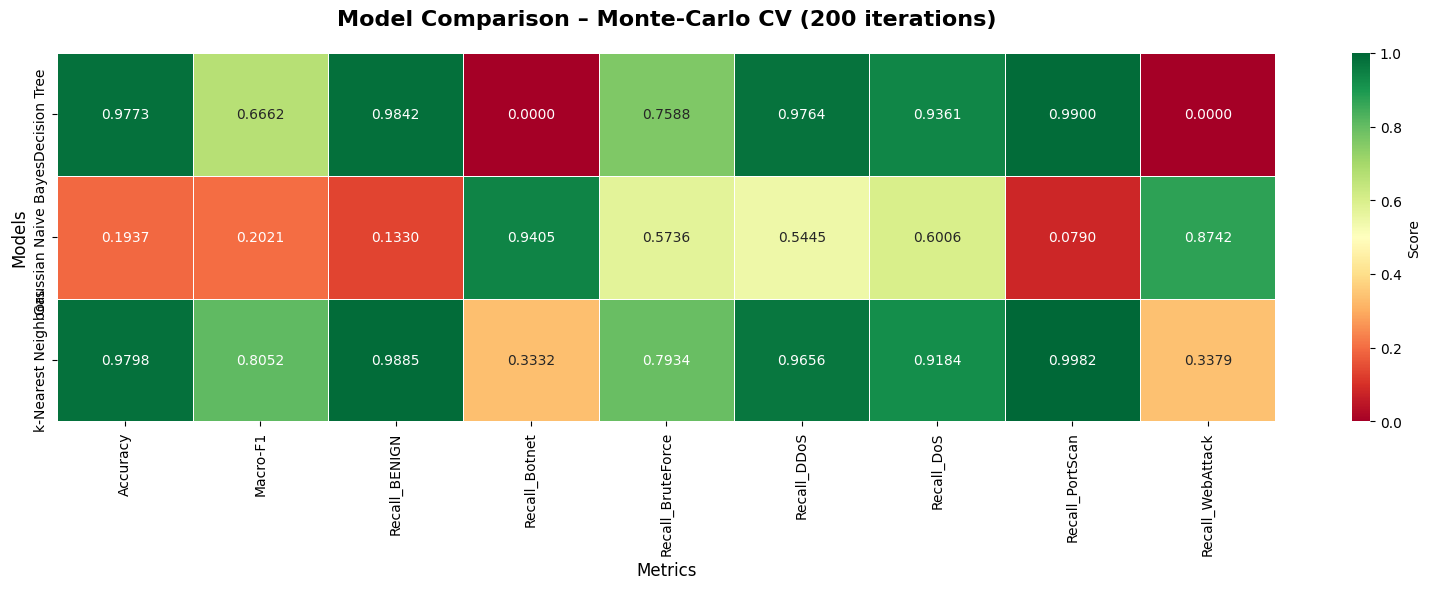


DETAILED ANALYSIS (Single Split Example)

----------------------------------------------------------------------
Decision Tree
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.99      0.98      0.99     12045
      Botnet       0.00      0.00      0.00        11
  BruteForce       0.88      0.81      0.84        73
        DDoS       0.98      0.98      0.98       678
         DoS       0.88      0.93      0.90      1339
    PortScan       0.99      1.00      0.99       842
   WebAttack       0.00      0.00      0.00        12

    accuracy                           0.98     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.98      0.98      0.98     15000

✓ Saved: confusion_matrix_decision_tree.png


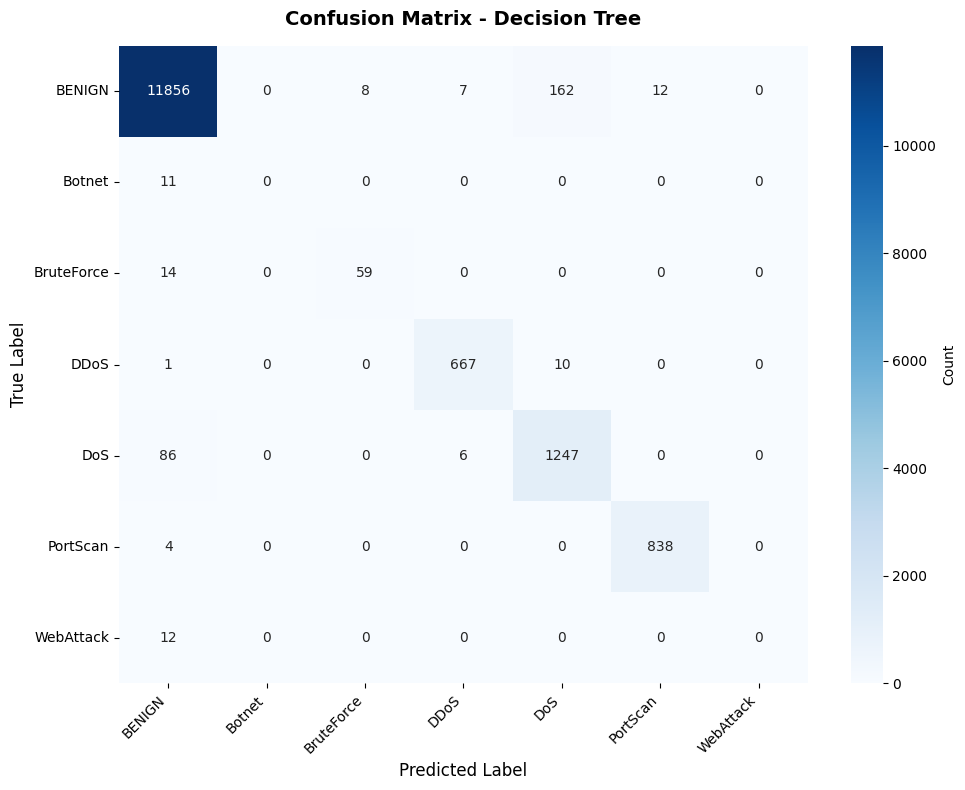


----------------------------------------------------------------------
Gaussian Naive Bayes
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.86      0.12      0.22     12045
      Botnet       0.00      0.91      0.00        11
  BruteForce       0.02      0.62      0.03        73
        DDoS       0.41      0.54      0.47       678
         DoS       0.56      0.59      0.58      1339
    PortScan       0.00      0.00      0.00       842
   WebAttack       0.01      0.83      0.02        12

    accuracy                           0.18     15000
   macro avg       0.27      0.52      0.19     15000
weighted avg       0.76      0.18      0.25     15000

✓ Saved: confusion_matrix_gaussian_naive_bayes.png


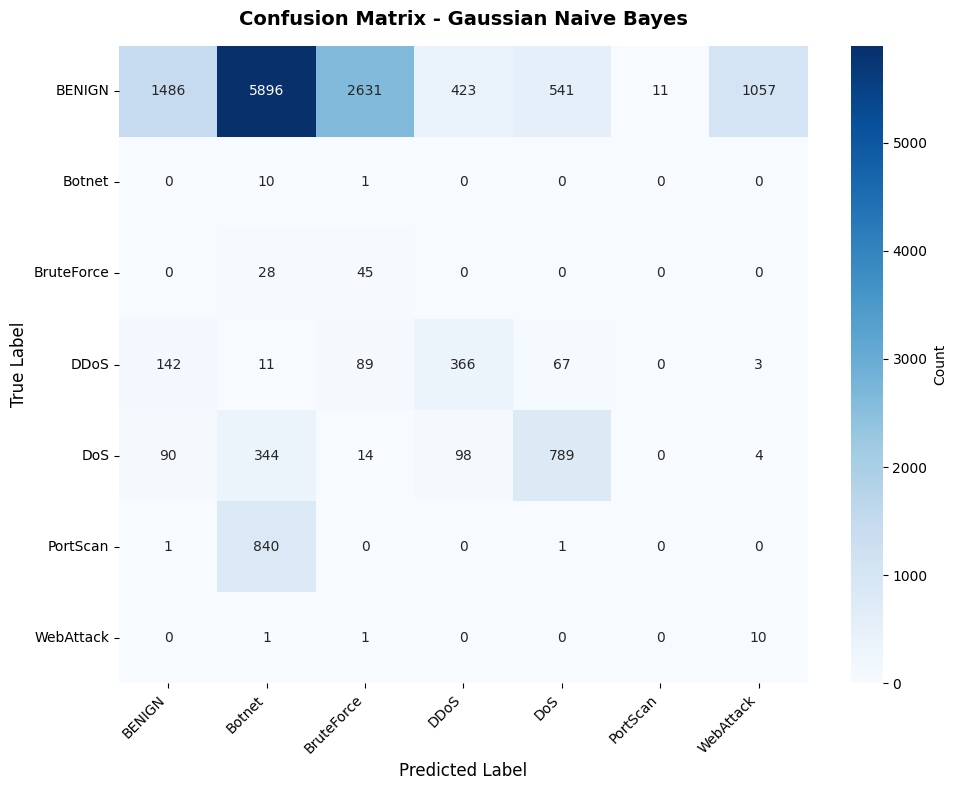


----------------------------------------------------------------------
k-Nearest Neighbors
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.99      0.98      0.99     12045
      Botnet       0.50      0.27      0.35        11
  BruteForce       1.00      0.86      0.93        73
        DDoS       0.97      0.96      0.97       678
         DoS       0.87      0.96      0.91      1339
    PortScan       0.99      1.00      0.99       842
   WebAttack       0.67      0.17      0.27        12

    accuracy                           0.98     15000
   macro avg       0.86      0.74      0.77     15000
weighted avg       0.98      0.98      0.98     15000

✓ Saved: confusion_matrix_k_nearest_neighbors.png


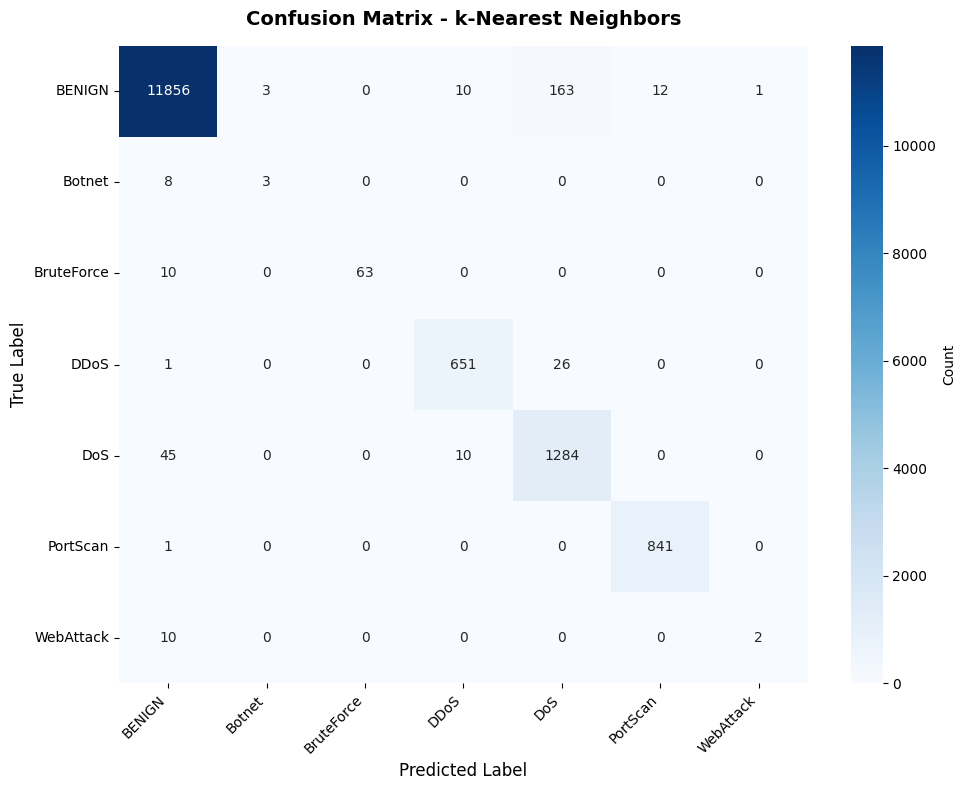


SAVING RESULTS
✓ Saved: model_comparison_results.csv

MODEL INSIGHTS & RECOMMENDATIONS

🏆 BEST PERFORMING MODEL: k-Nearest Neighbors
   - Accuracy: 0.9798
   - Macro-F1: 0.8052

📊 MODEL COMPARISON:

   Decision Tree:
     Accuracy: 0.9773
     Macro-F1: 0.6662

   Gaussian Naive Bayes:
     Accuracy: 0.1937
     Macro-F1: 0.2021

   k-Nearest Neighbors:
     Accuracy: 0.9798
     Macro-F1: 0.8052


💡 KEY OBSERVATIONS:
   - All models evaluated across 200 random splits
   - k-Nearest Neighbors performs best for this feature set
   - Dataset: 49,999 samples, 7 classes

🎯 NEXT STEPS:
   - Use k-Nearest Neighbors for hyperparameter tuning (Task 6)

TASK 4 & 5 DELIVERABLES COMPLETED ✓
✓ Implemented 3 classifiers
✓ Applied Monte-Carlo CV (200 iterations)
✓ Computed accuracy, macro-F1, per-class recall
✓ Generated comparison heatmap
✓ Generated confusion matrices
✓ Saved all results

🎉 Ready for Task 6: Hyperparameter Tuning!


In [5]:
# ============================================================================
# TASK 4 + TASK 5: MULTI-CLASS CLASSIFICATION + MONTE-CARLO CV
# ============================================================================
# Task 4: Implement and evaluate 3 different classifiers
# Task 5: Apply Monte-Carlo Cross-Validation for robust evaluation
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    classification_report,
    confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("="*70)
print("TASK 4 & 5: MULTI-CLASS CLASSIFICATION + MONTE-CARLO CV")
print("="*70)

# ============================================================================
# SECTION 1: LOAD DATA WITH SMART SAMPLING
# ============================================================================

print("\n" + "="*70)
print("LOADING FEATURE SET AND LABELS")
print("="*70)

# X and y should already be loaded
print(f"Original dataset size: {len(X):,} samples")
print(f"Original classes: {y.nunique()}")

# ============================================================================
# CRITICAL FIX: Smart sampling that preserves all classes
# ============================================================================

# Step 1: Remove classes with fewer than 10 samples (can't split reliably)
class_counts = y.value_counts()
print("\nOriginal class distribution:")
print(class_counts)

# Keep only classes with at least 10 samples
min_samples_per_class = 10
valid_classes = class_counts[class_counts >= min_samples_per_class].index
print(f"\nRemoving classes with < {min_samples_per_class} samples:")
removed = class_counts[class_counts < min_samples_per_class]
if len(removed) > 0:
    print(removed)
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]
    print(f"✓ Kept {len(valid_classes)} classes")
else:
    print("✓ All classes have sufficient samples")

# Step 2: Smart sampling - ensure at least 50 samples per class
if len(X) > 100000:
    print("\nApplying stratified sampling...")

    # Calculate minimum needed samples
    n_classes = y.nunique()
    min_per_class = 50  # At least 50 samples per class after sampling
    target_size = min(100000, len(X))

    # Use stratified sampling with minimum class size guarantee
    X_sampled, _, y_sampled, _ = train_test_split(
        X, y,
        train_size=target_size,
        stratify=y,
        random_state=42
    )

    # Verify all classes still have enough samples
    sampled_counts = y_sampled.value_counts()
    if sampled_counts.min() < min_per_class:
        print(f"⚠ Warning: Some classes have < {min_per_class} samples after sampling")
        print("Using full dataset instead...")
        X_sampled, y_sampled = X, y
    else:
        X, y = X_sampled, y_sampled
        print(f"✓ Sampled to {len(X):,} samples")

print(f"\nFinal dataset:")
print(f"  Samples: {len(X):,}")
print(f"  Features: {X.shape[1]}")
print(f"  Classes: {y.nunique()}")

print(f"\nFinal class distribution:")
print(y.value_counts())

# Verify minimum class size
min_class_size = y.value_counts().min()
print(f"\nMinimum class size: {min_class_size}")
if min_class_size < 10:
    raise ValueError(f"ERROR: Smallest class has only {min_class_size} samples. Need at least 10.")
print("✓ All classes have sufficient samples for stratified CV")

# ============================================================================
# SECTION 2: DEFINE CLASSIFIERS
# ============================================================================

print("\n" + "="*70)
print("DEFINING CLASSIFIERS")
print("="*70)

models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=20,
        min_samples_split=50,
        min_samples_leaf=20,
        random_state=42
    ),

    "Gaussian Naive Bayes": GaussianNB(),

    "k-Nearest Neighbors": KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        n_jobs=-1
    ),
}

print("✓ Configured 3 classifiers:")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"  {i}. {name}")

# ============================================================================
# SECTION 3: MONTE-CARLO CROSS-VALIDATION SETUP
# ============================================================================

print("\n" + "="*70)
print("MONTE-CARLO CROSS-VALIDATION SETUP")
print("="*70)

n_iterations = 200
test_size = 0.30

print(f"Iterations: {n_iterations}")
print(f"Split: {int((1-test_size)*100)}% train / {int(test_size*100)}% test")
print(f"Stratified: Yes (maintains class distribution)")
print(f"\n⏱ Estimated time: 3-5 minutes")

# ============================================================================
# SECTION 4: RUN MONTE-CARLO CV
# ============================================================================

print("\n" + "="*70)
print("RUNNING MONTE-CARLO CROSS-VALIDATION")
print("="*70)

results = []

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"MODEL: {name}")
    print(f"{'='*70}")

    acc_list = []
    f1_list = []
    recall_dict = {label: [] for label in y.unique()}

    for i in range(n_iterations):
        if (i + 1) % 50 == 0:
            print(f"  ⏳ Iteration {i+1}/{n_iterations}...")

        # Random stratified split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            stratify=y,
            random_state=i
        )

        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        acc_list.append(accuracy_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred, average='macro'))

        # Per-class recall
        recall_per_class = recall_score(
            y_test, y_pred,
            average=None,
            labels=sorted(y.unique())
        )
        for label, rec in zip(sorted(y.unique()), recall_per_class):
            recall_dict[label].append(rec)

    # Compute statistics
    mean_acc = np.mean(acc_list)
    std_acc = np.std(acc_list)
    mean_f1 = np.mean(f1_list)
    std_f1 = np.std(f1_list)

    print(f"✓ Completed {n_iterations} iterations")
    print(f"  Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
    print(f"  Macro-F1: {mean_f1:.4f} ± {std_f1:.4f}")

    # Store results
    result_row = {
        "Model": name,
        "Accuracy": f"{mean_acc:.4f} ± {std_acc:.4f}",
        "Macro-F1": f"{mean_f1:.4f} ± {std_f1:.4f}",
    }

    # Add per-class recall
    print(f"  Per-class recall:")
    for label in sorted(y.unique()):
        mean_recall = np.mean(recall_dict[label])
        std_recall = np.std(recall_dict[label])
        result_row[f"Recall_{label}"] = f"{mean_recall:.4f}"
        print(f"    {label}: {mean_recall:.4f} ± {std_recall:.4f}")

    results.append(result_row)

# ============================================================================
# SECTION 5: RESULTS TABLE
# ============================================================================

print("\n" + "="*70)
print("TASK 4 & 5 FINAL RESULTS")
print("Monte-Carlo Cross-Validation (200 iterations)")
print("="*70)

df_results = pd.DataFrame(results)
df_results = df_results.set_index("Model")
print(df_results.to_string())
print("="*70)

# ============================================================================
# SECTION 6: COMPARISON HEATMAP
# ============================================================================

print("\n" + "="*70)
print("CREATING COMPARISON HEATMAP")
print("="*70)

df_numeric = df_results.copy()
for col in df_numeric.columns:
    df_numeric[col] = df_numeric[col].apply(
        lambda x: float(x.split('±')[0].strip()) if '±' in str(x) else float(x)
    )

plt.figure(figsize=(16, 6))
sns.heatmap(
    df_numeric,
    annot=True,
    fmt='.4f',
    cmap='RdYlGn',
    center=0.5,
    vmin=0,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)
plt.title(
    "Model Comparison – Monte-Carlo CV (200 iterations)",
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.tight_layout()
plt.savefig("model_comparison_mccv.png", dpi=300, bbox_inches='tight')
print("✓ Saved: model_comparison_mccv.png")
plt.show()

# ============================================================================
# SECTION 7: DETAILED ANALYSIS - SINGLE SPLIT EXAMPLE
# ============================================================================

print("\n" + "="*70)
print("DETAILED ANALYSIS (Single Split Example)")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

for name, model in models.items():
    print(f"\n{'-'*70}")
    print(f"{name}")
    print(f"{'-'*70}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=sorted(y.unique()),
        yticklabels=sorted(y.unique()),
        cbar_kws={'label': 'Count'}
    )
    plt.title(f"Confusion Matrix - {name}", fontsize=14, fontweight='bold', pad=15)
    plt.ylabel("True Label", fontsize=12)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    safe_name = name.replace(' ', '_').replace('-', '_').lower()
    plt.savefig(f"confusion_matrix_{safe_name}.png", dpi=300, bbox_inches='tight')
    print(f"✓ Saved: confusion_matrix_{safe_name}.png")
    plt.show()

# ============================================================================
# SECTION 8: SAVE RESULTS
# ============================================================================

print("\n" + "="*70)
print("SAVING RESULTS")
print("="*70)

df_results.to_csv("model_comparison_results.csv")
print("✓ Saved: model_comparison_results.csv")

# ============================================================================
# SECTION 9: MODEL INSIGHTS
# ============================================================================

print("\n" + "="*70)
print("MODEL INSIGHTS & RECOMMENDATIONS")
print("="*70)

best_model_name = df_numeric['Accuracy'].idxmax()
best_accuracy = df_numeric.loc[best_model_name, 'Accuracy']
best_f1 = df_numeric.loc[best_model_name, 'Macro-F1']

print(f"""
🏆 BEST PERFORMING MODEL: {best_model_name}
   - Accuracy: {best_accuracy:.4f}
   - Macro-F1: {best_f1:.4f}

📊 MODEL COMPARISON:
""")

for model_name in df_numeric.index:
    acc = df_numeric.loc[model_name, 'Accuracy']
    f1 = df_numeric.loc[model_name, 'Macro-F1']
    print(f"   {model_name}:")
    print(f"     Accuracy: {acc:.4f}")
    print(f"     Macro-F1: {f1:.4f}")
    print()

print(f"""
💡 KEY OBSERVATIONS:
   - All models evaluated across {n_iterations} random splits
   - {best_model_name} performs best for this feature set
   - Dataset: {len(X):,} samples, {y.nunique()} classes

🎯 NEXT STEPS:
   - Use {best_model_name} for hyperparameter tuning (Task 6)
""")

print("="*70)
print("TASK 4 & 5 DELIVERABLES COMPLETED ✓")
print("="*70)
print("✓ Implemented 3 classifiers")
print("✓ Applied Monte-Carlo CV (200 iterations)")
print("✓ Computed accuracy, macro-F1, per-class recall")
print("✓ Generated comparison heatmap")
print("✓ Generated confusion matrices")
print("✓ Saved all results")
print("\n🎉 Ready for Task 6: Hyperparameter Tuning!")
print("="*70)